# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

One of the most intuitive explanations of **eigenvectors** of a **covariance** matrix is that they are the **directions** in which the **data varies most**. 
1. The **first eigenvector** is the direction in which **the data varies the most**. 
2. The **second eigenvector** is the direction of **greatest variance** among those that are orthogonal (**perpendicular**) **to the first eigenvector**. 
3. The **third eigenvector** is the direction of **greatest variance** among those **orthogonal** **to the first two**, and so on
4. The objective of this experiment is to visualize the **effect of eigen values **for different covariance matrices.
  

### Setup Steps

In [3]:
#@title Please enter your registration id to start:  { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [6]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_CS_Different_Covariances" #name of the notebook
Answer = "Ungraded"
def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


###Importing required packages

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

###Getting Eigen vectors and Eigen values

The below is the function to get eigen vectors and eigen values from the mean corrected data.

In [8]:
def get_eigen(data):
    mu = data.mean(axis=0)
    data_mean_corrected = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data_mean_corrected.T, full_matrices=False)
    projected_data = np.dot(data_mean_corrected, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    return mu, eigenvectors, eigenvalues

###Plotting Eigen vectors

The below function is for plotting eigen vectors

In [9]:
def plot_eigen(data, mu, eigenvectors, name):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.plot(data[:,0],data[:,1], 'r*', markersize=12)
    for index, axis in enumerate(eigenvectors):
        d = np.vstack((mu - 12 * axis, mu + 12 * axis))
        plt.plot(d[:,0], d[:,1], label = 'Eigen Vector '+str(index+1))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.title(name)
    plt.legend()
    plt.savefig(name+'.png')

In this case study, each data sample is a 2 dimensional point with coordinates x, y taken from the normal distribution with specified mean and variance. We will see the plot of the two eigenvectors of the covariance matrix of these data samples and the eigenvalues are the length of the arrows.

We can see from the below plots that the first eigenvector points (from the mean of the data) in the direction in which the data varies the most, and the second eigenvector is orthogonal (perpendicular) to the first.


###Equal Eigen values $\lambda_{1} = \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[1,0],[0,1]]$, we can visualize the below eigen vectors. Here, both the eigen values are equal and the distribution is circular.


In [ ]:
mean = [0, 0]
cov = [[1,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 1000)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB"+'1 = '+u"\u03BB" +'2')
print(eigenvalues)

###Unequal Eigen values $\lambda_{1} \neq \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[0.8,0.5], [0.2,0.2]]$, we can visualize the below eigen vectors. Here, **one eigen value** is **greater** than the other and the **distribution** is **elongated** in the direction of that eigen vector.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[10.77085528  2.49840858]


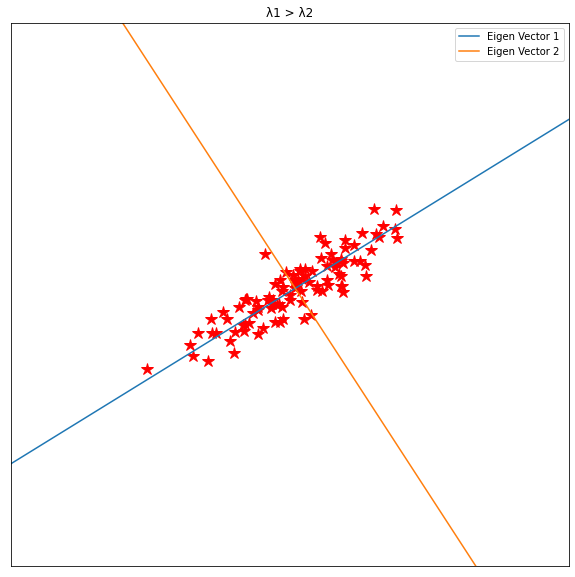

In [10]:
mean = [0, 0]
cov = [[0.8,0.5], [0.2,0.2]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors,u"\u03BB"+'1 > '+u"\u03BB" +'2')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{1} = 0$

For the data with mean = $[0,0]$ and covariance $[[0,0], [0,1]]$, we can visualize the below eigen vectors. Here, **only one Eigen value is non-zero**, **distribution** of data will **align** on that Eigen vector and the distribution is **along vertical axis**.

[1.00470439e+01 8.20911219e-17]


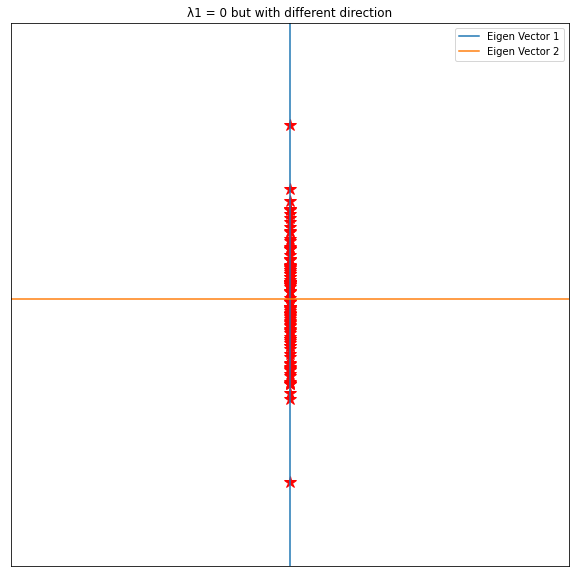

In [13]:
mean = [0, 0]
cov = [[0,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'1 = 0 but with different direction')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{2} = 0$

For the data with mean = $[0,0]$ and covariance $[[1,0], [0,0]]$, we can visualize the below eigen vectors. Here, **only one Eigen value is non-zero**, distribution of data will **align on that Eigen** vector and the distribution is **along horizontal axis**.


[9.75543948 0.        ]


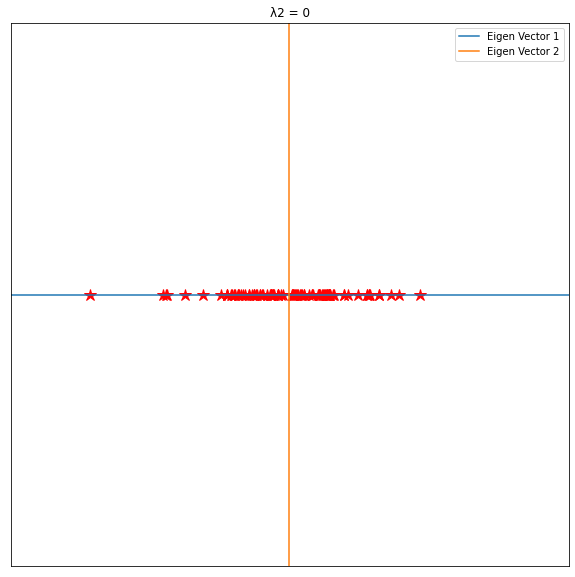

In [12]:
mean = [0, 0]
cov = [[1,0], [0,0]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'2 = 0')
print(eigenvalues)

## Please answer the questions below to complete the experiment:

In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [15]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "More animation or real life project that makes use of PCA" #@param {type:"string"}


In [16]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [17]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8400
Date of submission:  31 Oct 2020
Time of submission:  03:27:13
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
